<a href="https://colab.research.google.com/github/Ganesh00000/student_performance_analysis/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


{'StudentsPerformance.csv': b'"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"\n"female","group B","bachelor\'s degree","standard","none","72","72","74"\n"female","group C","some college","standard","completed","69","90","88"\n"female","group B","master\'s degree","standard","none","90","95","93"\n"male","group A","associate\'s degree","free/reduced","none","47","57","44"\n"male","group C","some college","standard","none","76","78","75"\n"female","group B","associate\'s degree","standard","none","71","83","78"\n"female","group B","some college","standard","completed","88","95","92"\n"male","group B","some college","free/reduced","none","40","43","39"\n"male","group D","high school","free/reduced","completed","64","64","67"\n"female","group B","high school","free/reduced","none","38","60","50"\n"male","group C","associate\'s degree","standard","none","58","54","52"\n"male","group D","associate\'s degre

In [4]:
data=pd.read_csv("/content/StudentsPerformance.csv")

In [5]:
data.shape

(1000, 8)

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data["total_score"]=data["math score"]+data["reading score"]+data["writing score"]

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [9]:
data.groupby("gender")["total_score"].mean()

gender
female    208.708494
male      197.512448
Name: total_score, dtype: float64

female is doing better as compare to male

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


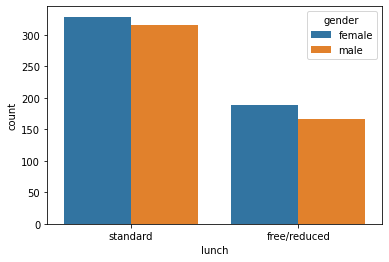

In [10]:
sb.countplot(data["lunch"],hue=data["gender"])

this shows that female is more in number.

In [11]:
data.groupby("test preparation course")["total_score"].mean()

test preparation course
completed    218.008380
none         195.116822
Name: total_score, dtype: float64

one who have completed test preparation has got better result

race/ethnicity doesn't matter in performance of student .so we'll drop this column

In [13]:
data.drop("race/ethnicity",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

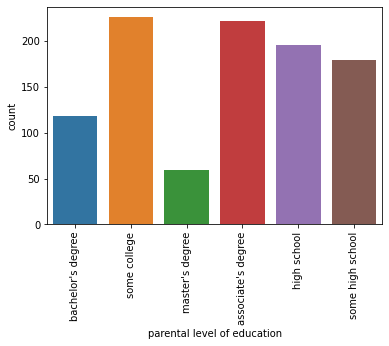

In [16]:
sb.countplot(data["parental level of education"])
plt.xticks(rotation=90)

In [18]:
data.groupby("parental level of education")["total_score"].mean()

parental level of education
associate's degree    208.707207
bachelor's degree     215.771186
high school           189.290816
master's degree       220.796610
some college          205.429204
some high school      195.324022
Name: total_score, dtype: float64

In [19]:
data.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score'],
      dtype='object')

total score mainly depends on parental level of education and test preparation course.

In [20]:
data_=data.copy()

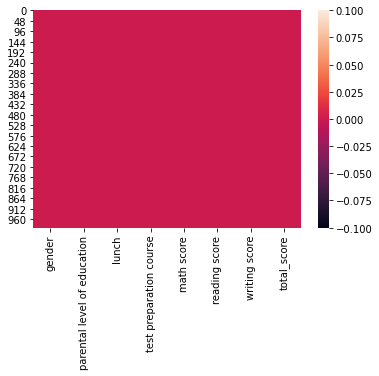

In [26]:
sb.heatmap(data_.isnull())

In [21]:
data=data[["parental level of education","test preparation course","total_score"]]

In [22]:
data.head()

,parental level of education,test preparation course,total_score
0,bachelor's degree,none,218
1,some college,completed,247
2,master's degree,none,278
3,associate's degree,none,148
4,some college,none,229


In [24]:
data=pd.get_dummies(data)

In [25]:
data.head()

,total_score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,218,0,1,0,0,0,0,0,1
1,247,0,0,0,0,1,0,1,0
2,278,0,0,0,1,0,0,0,1
3,148,1,0,0,0,0,0,0,1
4,229,0,0,0,0,1,0,0,1


now we'll build machine learning model.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
x=data.drop("total_score",axis=1)

In [62]:
y=data["total_score"].values

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [47]:
regressor=RandomForestRegressor()

In [58]:
n_estimators=[int(x) for x in np.linspace(50,1000,15)]
criterion=["mse","mae"]
max_depth=[int(x) for x in np.linspace(1,10,10)]

In [59]:
random_grid={"n_estimators":n_estimators,"criterion":criterion,"max_depth":max_depth}
print(random_grid)

{'n_estimators': [50, 117, 185, 253, 321, 389, 457, 525, 592, 660, 728, 796, 864, 932, 1000], 'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [60]:
tuned_regressor=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid)

In [64]:
tuned_regressor.fit(x_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [66]:
y_predict=tuned_regressor.predict(x_test)

In [67]:
print(pd.DataFrame({"Actutal":y_test,"predicted":y_predict}))

     Actutal   predicted
0        234  223.304183
1        231  210.259762
2        196  196.081754
3        147  187.846305
4        229  205.277153
..       ...         ...
195      228  223.304183
196      187  196.081754
197      202  187.846305
198      168  196.081754
199      236  205.026995

[200 rows x 2 columns]


In [69]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

42.23869845085673
